# Import des données

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv("data.csv")
df.head()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
0,73,161.1,67.3,857,NaN,0.11,615.0,1377.97,13157.101646
1,44,168.2,74.9,5245,2.0,0.79,NaN,10000.00,32408.309272
2,71,160.3,45.5,3792,0.0,0.13,NaN,5000.00,17975.461375
3,62,161.9,87.7,3291,NaN,0.32,NaN,10000.00,16004.737731
4,18,178.0,77.6,3893,NaN,0.66,NaN,NaN,10437.682760


# Exclusion des colonnes sensibles

Les données jugées sensibles et non corrélées au résultat voulu sont les colonnes age, taile et poids

In [391]:
df = df.drop(columns=["age","taille","poids"])

# Supprimer les doublons

In [392]:
df = df.drop_duplicates()

# Lister les colonnes qui sont null

In [393]:
df.isnull().sum().sort_values(ascending=False)

score_credit          5295
historique_credits    5282
loyer_mensuel         2898
revenu_estime_mois       0
risque_personnel         0
montant_pret             0
dtype: int64

# Enlever les lignes qui ont les colonnes historique_credits, score_credit et loyer_mensuel à null

Ces colonnes sont essentielles au bon calcul du resultat final, il faut donc qu'elles soient toutes présentes dans le dataset

In [394]:
df = df.dropna(subset=["historique_credits","score_credit","loyer_mensuel"], how= "all")

In [395]:
df.isnull().sum().sort_values(ascending=False)

score_credit          4448
historique_credits    4435
loyer_mensuel         2051
revenu_estime_mois       0
risque_personnel         0
montant_pret             0
dtype: int64

<Axes: >

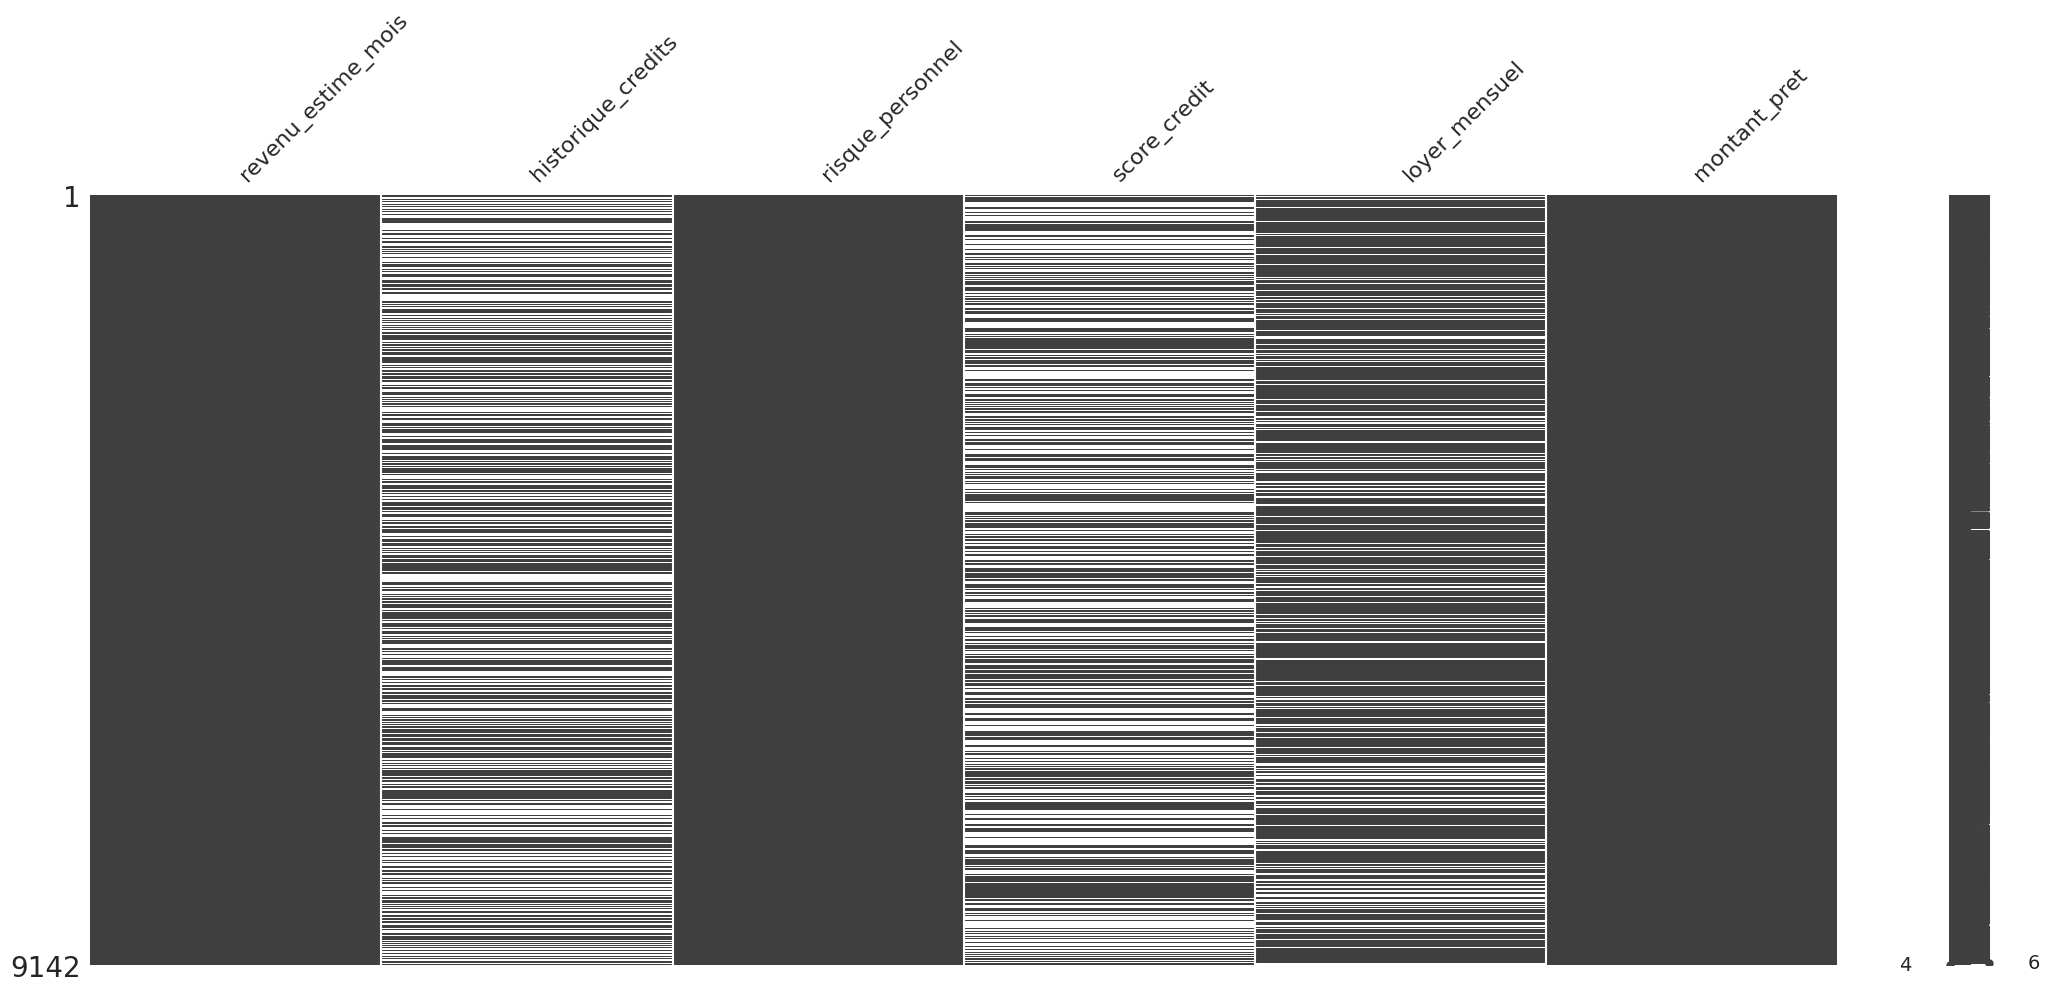

In [396]:
msno.matrix(df)

# Inputage des données manquantes

## KNN Imputer

In [397]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df = imputer.fit_transform(df)
#
# msno.matrix(df)

## Winsorisation (valeurs extremes limitées a 1er  et 99e percentile)

# Filtrer les outliers  couper les données à plus de 3 fois de leur écart interquartile

In [398]:
for col in df.columns:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

# Visualisation de la distribution pour chaque colonne

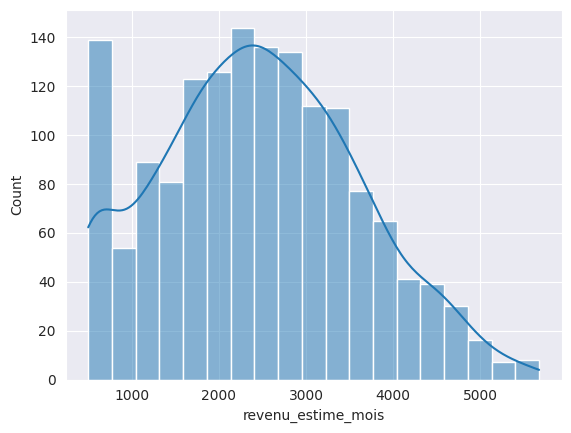

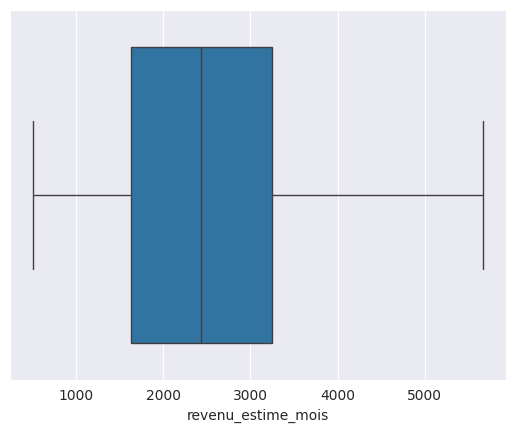

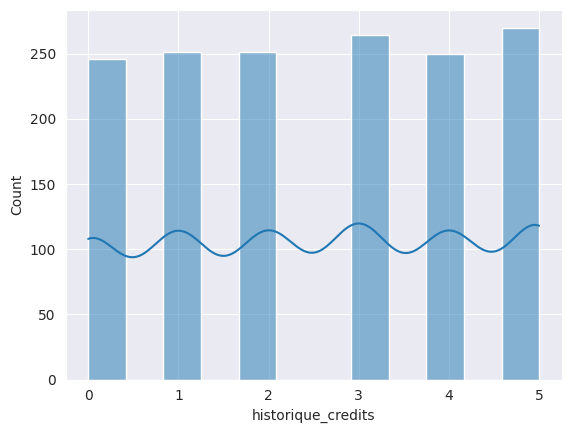

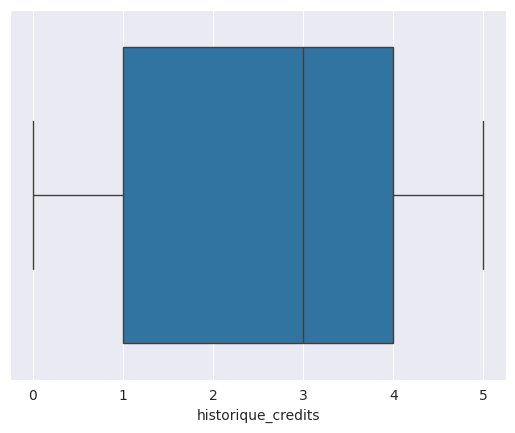

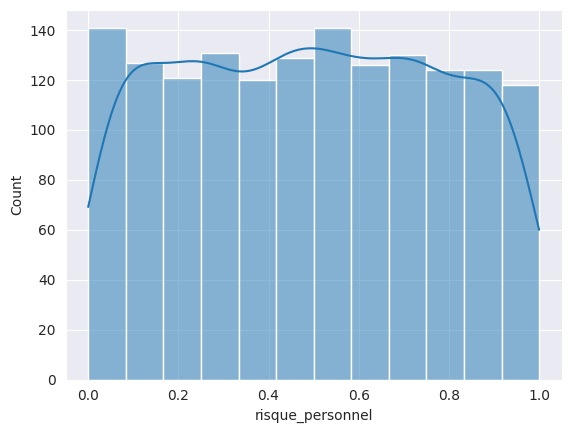

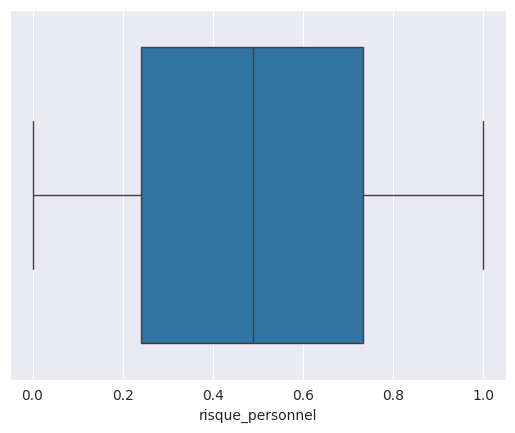

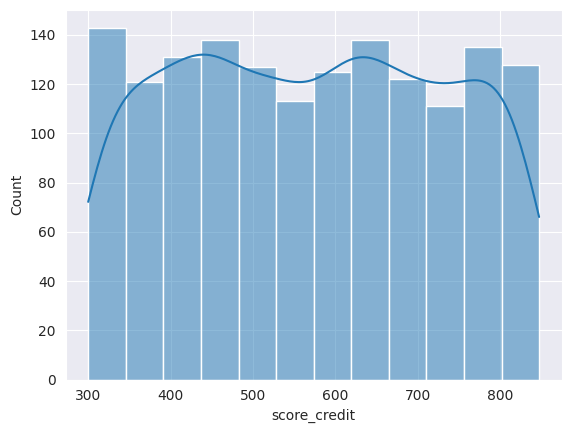

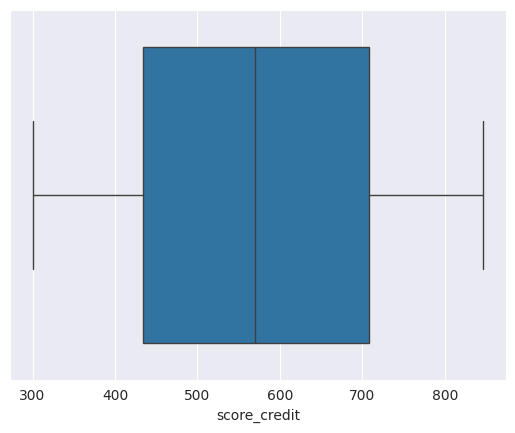

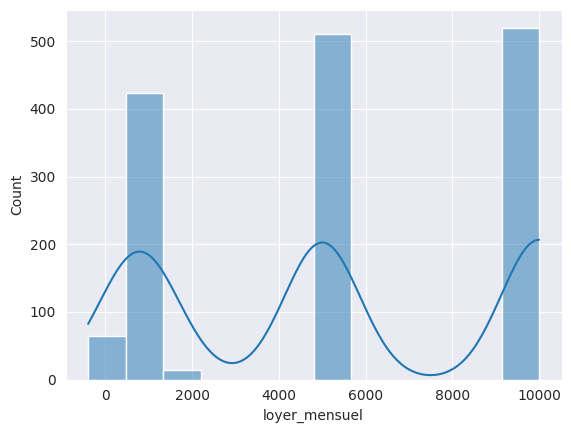

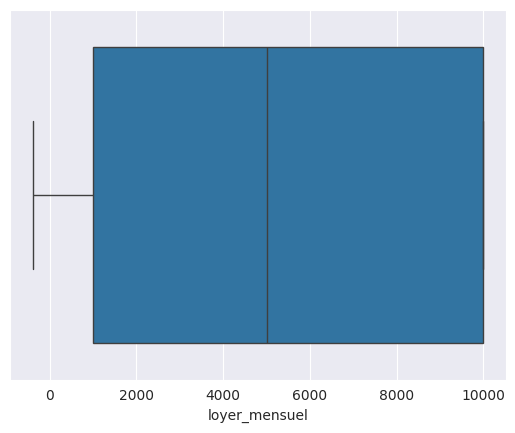

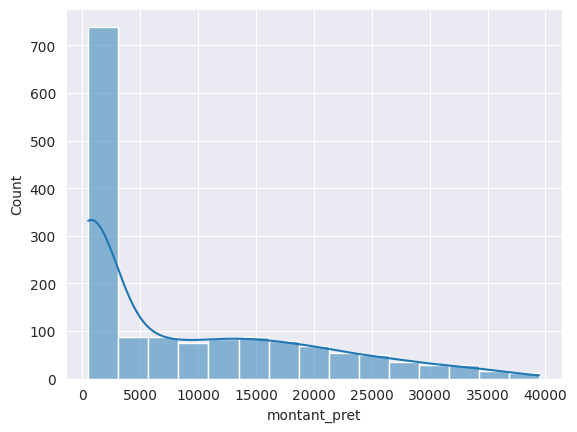

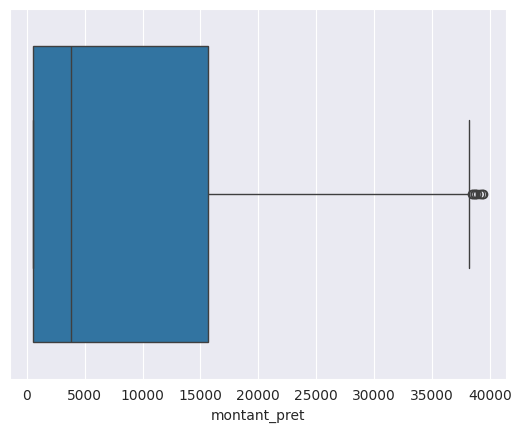

In [399]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()
    # Boxplot pour détecter les outliers dans les revenus
    sns.boxplot(x=df[col])
    plt.show()

In [400]:
df.describe()

,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000
mean,2455.805483,2.542428,0.492644,570.372715,5316.770646,8842.144107
std,1149.417617,1.710276,0.288377,160.289549,3773.231069,10180.227402
min,500.000000,0.000000,0.000000,300.000000,-395.250000,500.000000
25%,1631.750000,1.000000,0.240000,433.750000,1004.240000,500.000000
50%,2428.500000,3.000000,0.490000,569.500000,5000.000000,3823.206462
75%,3251.000000,4.000000,0.732500,708.000000,10000.000000,15647.883914
max,5674.000000,5.000000,1.000000,847.000000,10000.000000,39450.384732


<Axes: >

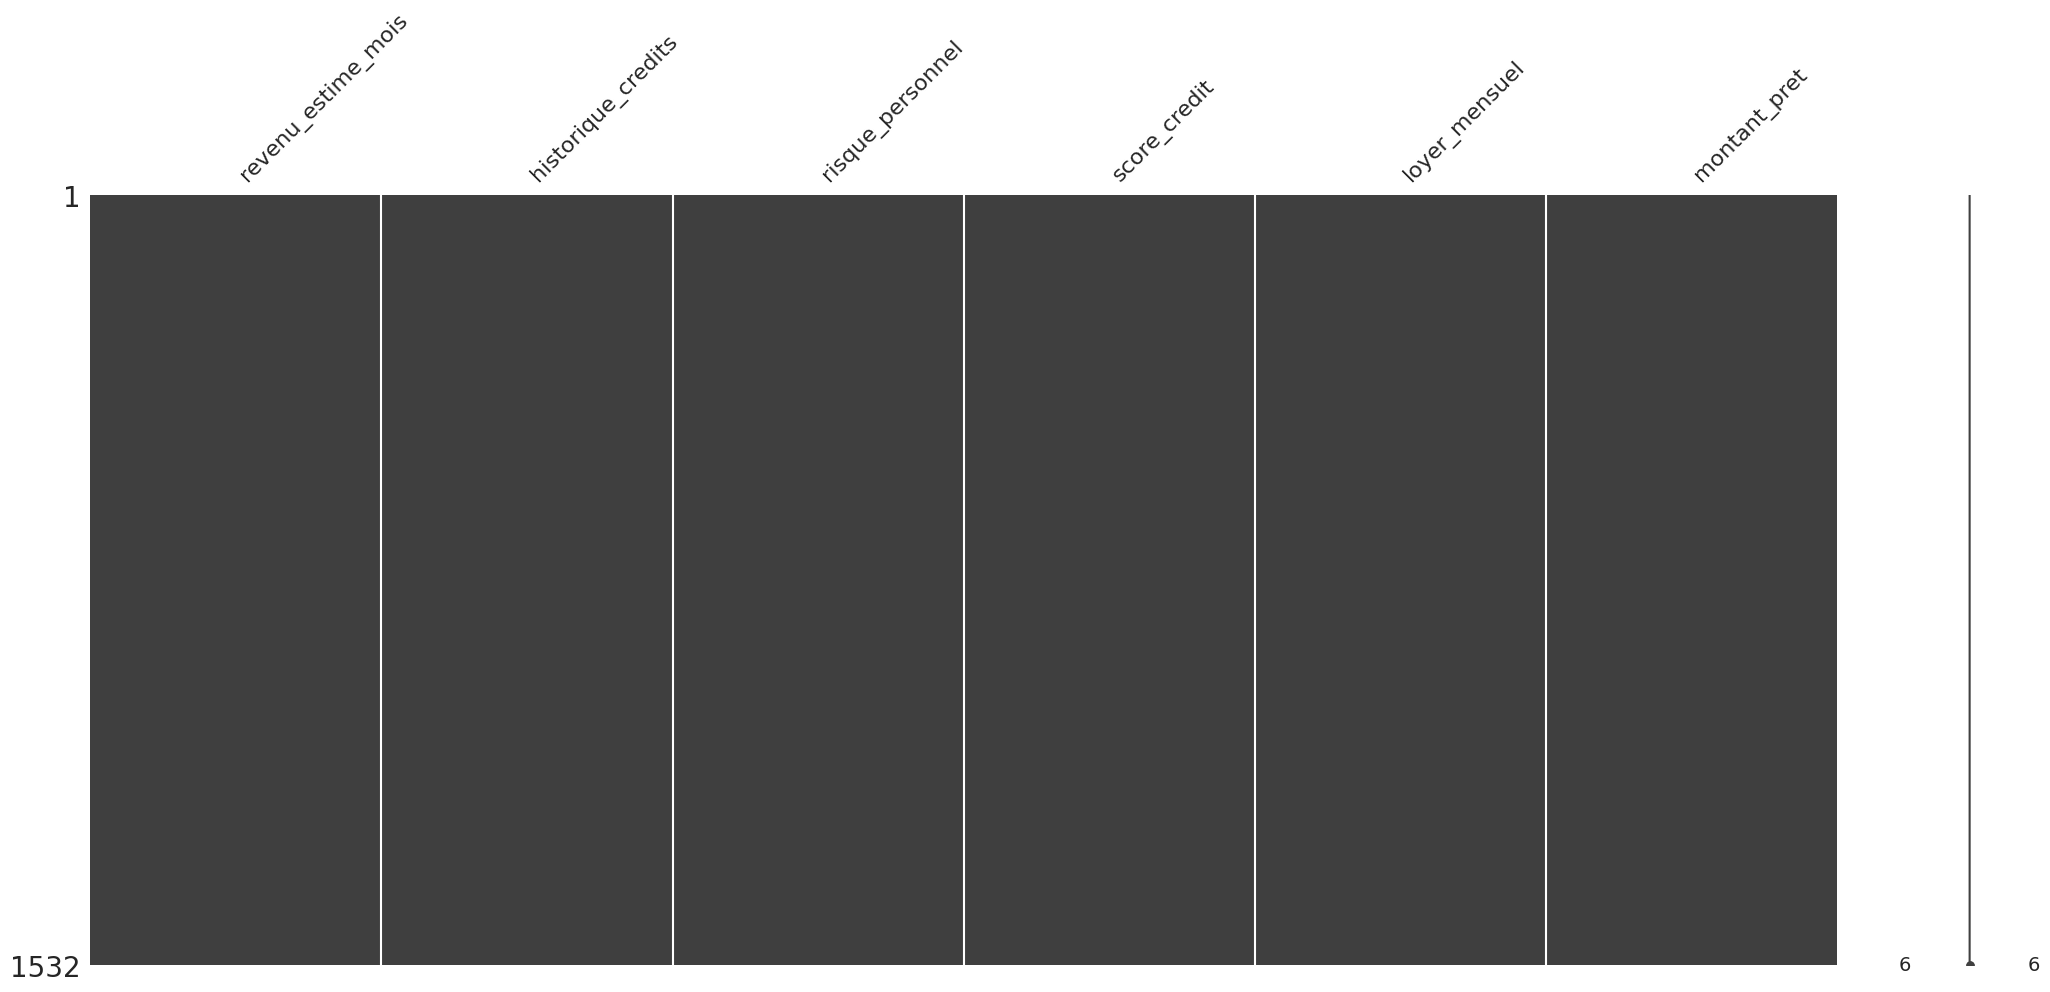

In [401]:
msno.matrix(df)